<h2 style='color:blue' align='center'>Sports Celebrity Image Classification<h2>

Special thanks to Debjyoti Paul (My data scientist friend at Amazon) for help with this project

In [75]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [76]:
img = cv2.imread('./playground.jpeg')
img.shape
print(img)

[[[180 232 239]
  [180 232 239]
  [182 231 241]
  ...
  [193 229 229]
  [187 223 223]
  [180 215 218]]

 [[180 232 239]
  [180 232 239]
  [182 231 241]
  ...
  [194 230 230]
  [188 224 224]
  [182 217 220]]

 [[180 232 239]
  [180 232 239]
  [182 231 241]
  ...
  [198 232 232]
  [193 227 227]
  [186 221 224]]

 ...

 [[151 191 209]
  [147 188 210]
  [140 179 211]
  ...
  [ 62  84 155]
  [ 62  84 156]
  [ 59  82 157]]

 [[151 191 209]
  [147 188 210]
  [140 179 211]
  ...
  [ 61  83 154]
  [ 63  85 157]
  [ 58  81 156]]

 [[151 191 209]
  [147 188 210]
  [140 179 211]
  ...
  [ 61  83 154]
  [ 63  85 157]
  [ 58  81 156]]]


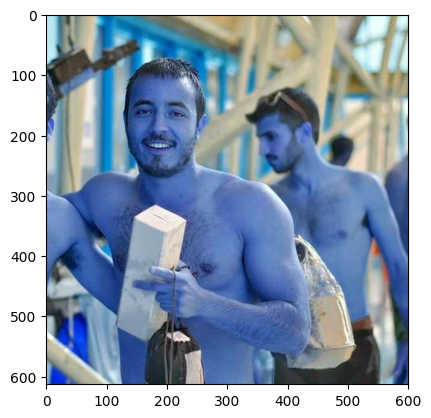

In [77]:
plt.imshow(img)

In [78]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(613, 601)

In [79]:
gray

array([[228, 228, 228, ..., 225, 219, 212],
       [228, 228, 228, ..., 226, 220, 214],
       [228, 228, 228, ..., 228, 223, 218],
       ...,
       [192, 190, 184, ..., 103, 103, 102],
       [192, 190, 184, ..., 102, 104, 101],
       [192, 190, 184, ..., 102, 104, 101]], dtype=uint8)

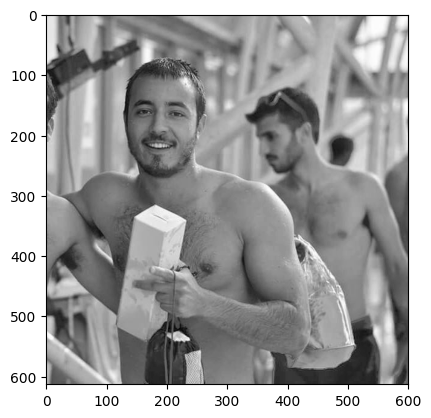

In [80]:
plt.imshow(gray, cmap='gray')

In [81]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[120, 110, 137, 137]], dtype=int32)

In [82]:
(x,y,w,h) = faces[0]
x,y,w,h

(120, 110, 137, 137)

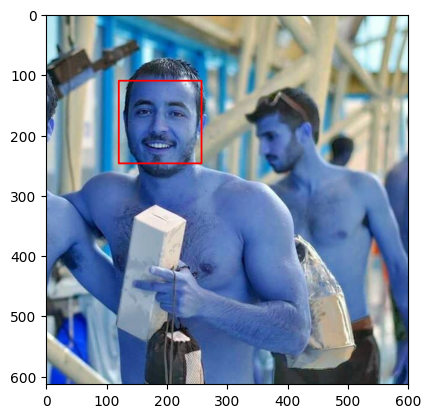

In [83]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

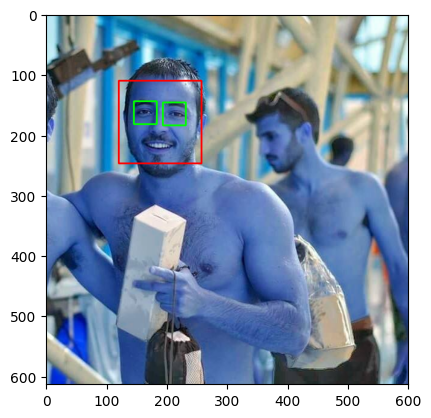

In [84]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    
    parameter = 1.0
#     for i in range(100):
#         parameter += 0.1
#         for i in range(3, 100):
#             #print(f"parameter ={parameter}, neighbor = {i}")
#             eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=parameter, minNeighbors=i)        
#             if eyes:
#                 print("FOUNDDDDD")
#                 print(eyes)
#                 break
#         print(eyes)
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.9, minNeighbors=1, minSize=(30, 30))        
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

<h3 style='color:purple'>(2) Preprocessing: Crop the facial region of the image</h3>

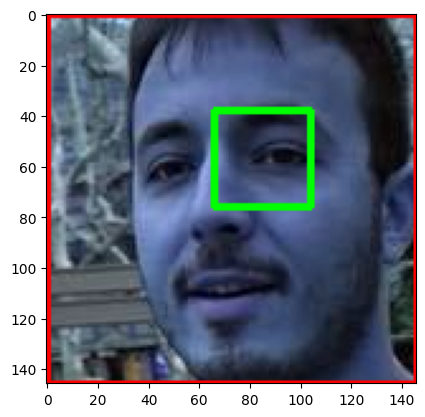

In [71]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [72]:
cropped_img = np.array(roi_color)
cropped_img.shape

(146, 146, 3)

<h3 style='color:purple'>(3) Preprocessing: Use wavelet transform as a feature for traning our model</h3>

#### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

### Wavelet transform

In [73]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

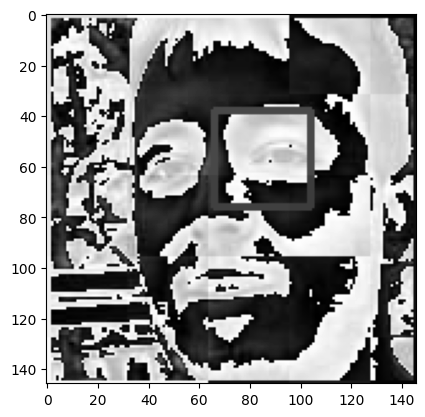

In [74]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')